In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [7]:
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows to understand the structure
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [14]:
X_categorical = df[['Gender']]
X_numeric = df.drop(columns=['Gender'])

encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid the dummy variable trap
X_categorical_encoded = encoder.fit_transform(X_categorical)

X = pd.concat([X_numeric, pd.DataFrame(X_categorical_encoded)], axis=1)

X.columns = X.columns.astype(str)

C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


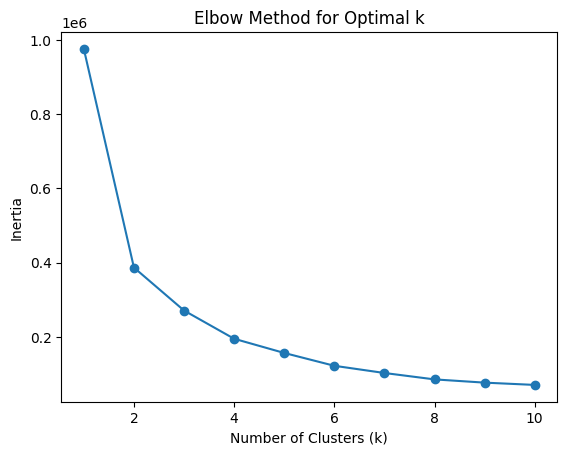

In [21]:


# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [29]:
chosen_k = 4

# Train the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
kmeans.fit(X)

# Assign cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster  
0          2  
1          2  
2          2  
3          2  
4          2